# Tic Tac Toe Q-Learning solving

In this notebook we will try to provide a model which is able to play correctly against a human and an other AI

## Imports

In [1]:
from classes.Agent.Agent import Agent
from classes.Agent.HumanAgent import HumanAgent
from classes.Agent.QLearningAgent import QLearningAgent
from classes.TicTacToe import TicTacToe

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Configuration

In [3]:
rewards = {
    "error_reward":-10.,
    "null_reward":-0.75,
    "win_reward":5.,
    "lose_reward":-1.,
    "draw_reward":-0.75
}
epochs = 1_000_000
epsilon_decrease = 1. / epochs

## Games

### Q-learning Agents

Here is the following equation used to update the Q matrix.

![Q](images/qlearning_equation.PNG)

#### epsilon decrease tests

In [4]:
agents = [
    {"name":"QLearningAgent1", "epsilon_decrease":0.00001, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent2", "epsilon_decrease":0.00002, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent3", "epsilon_decrease":0.00005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent4", "epsilon_decrease":0.0001, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent5", "epsilon_decrease":0.0002, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent6", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
]
scores = np.array([[0, 0, 0, 0, 0] for _ in agents], dtype=int)
agents_obj = []

In [5]:
for i in range(0, len(agents), 2):
    p1 = agents[i]
    p1 = QLearningAgent(p1["name"], epsilon=1., epsilon_decrease=p1["epsilon_decrease"], 
                       epsilon_min=p1["epsilon_min"], gamma=p1["gamma"], learning_rate=p1["learning_rate"])
    p2 = agents[i+1]
    p2 = QLearningAgent(p2["name"], epsilon=1., epsilon_decrease=p2["epsilon_decrease"], 
                       epsilon_min=p2["epsilon_min"], gamma=p2["gamma"], learning_rate=p2["learning_rate"])
        
    ttt = TicTacToe(p1, p2, rewards)
    ttt.train(epochs=epochs, verbose=0)
    agents_obj.append(p1)
    agents_obj.append(p2)

100%|██████████| 1000000/1000000 [01:50<00:00, 9053.24it/s]


In [12]:
for i in range(len(agents_obj)):
    for j in range(i+1,len(agents_obj)):
        p1 = agents_obj[i]
        p2 = agents_obj[j]
        
        ttt = TicTacToe(p1, p2, rewards)
        ttt.play(games=epochs, verbose=0)
        scores[i] += p1.results
        scores[j] += p2.results

100%|██████████| 1000000/1000000 [01:27<00:00, 11407.23it/s]


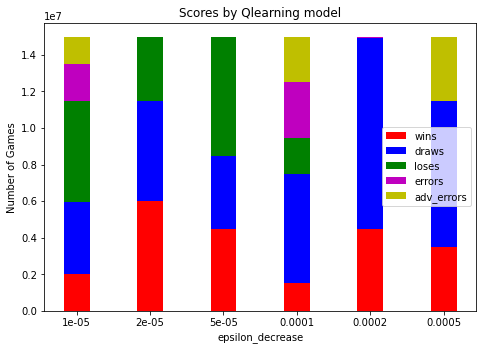

In [13]:
wins = scores[:,0]
draws = scores[:,1]
loses = scores[:,2]
errors = scores[:,3]
adv_errors = scores[:,4]
ind = np.arange(len(scores)) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, wins, width, color='r')
ax.bar(ind, draws, width,bottom=wins, color='b')
ax.bar(ind, loses, width,bottom=wins+draws, color='g')
ax.bar(ind, errors, width,bottom=wins+draws+loses, color='m')
ax.bar(ind, adv_errors, width,bottom=wins+draws+loses+errors, color='y')
ax.set_xlabel('epsilon_decrease')
ax.set_ylabel('Number of Games')
ax.set_title('Scores by Qlearning model')
ax.set_xticks(ind)
ax.set_xticklabels( [str(i["epsilon_decrease"]) for i in agents])
ax.legend(labels=['wins', 'draws', 'loses', 'errors', 'adv_errors'])
plt.show()

interpretations : 
* Models 5,6 are slightly better. The number of win and draws is way higher than the loses.
* Models 5,6 have more time to exploit and reinforce the best choices' path, in this cas it proves behind good since they just have some deafeat compared to other models

#### gamma tests

we will keep espsilon_decrease 0.0005 fixed this time, regarding last results.

In [14]:
agents = [
    {"name":"QLearningAgent1", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.60, "learning_rate":0.01},
    {"name":"QLearningAgent2", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.70, "learning_rate":0.01},
    {"name":"QLearningAgent3", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.80, "learning_rate":0.01},
    {"name":"QLearningAgent4", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.90, "learning_rate":0.01},
    {"name":"QLearningAgent5", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.95, "learning_rate":0.01},
    {"name":"QLearningAgent6", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
]
scores = np.array([[0, 0, 0, 0, 0] for _ in agents], dtype=int)
agents_obj = []

In [15]:
for i in range(0, len(agents), 2):
    p1 = agents[i]
    p1 = QLearningAgent(p1["name"], epsilon=1., epsilon_decrease=p1["epsilon_decrease"], 
                       epsilon_min=p1["epsilon_min"], gamma=p1["gamma"], learning_rate=p1["learning_rate"])
    p2 = agents[i+1]
    p2 = QLearningAgent(p2["name"], epsilon=1., epsilon_decrease=p2["epsilon_decrease"], 
                       epsilon_min=p2["epsilon_min"], gamma=p2["gamma"], learning_rate=p2["learning_rate"])
        
    ttt = TicTacToe(p1, p2, rewards)
    ttt.train(epochs=epochs, verbose=0)
    agents_obj.append(p1)
    agents_obj.append(p2)

100%|██████████| 1000000/1000000 [01:53<00:00, 8827.80it/s]


In [16]:
for i in range(len(agents_obj)):
    for j in range(i+1,len(agents_obj)):
        p1 = agents_obj[i]
        p2 = agents_obj[j]
        
        ttt = TicTacToe(p1, p2, rewards)
        ttt.play(games=epochs, verbose=0)
        scores[i] += p1.results
        scores[j] += p2.results

100%|██████████| 1000000/1000000 [01:27<00:00, 11428.42it/s]


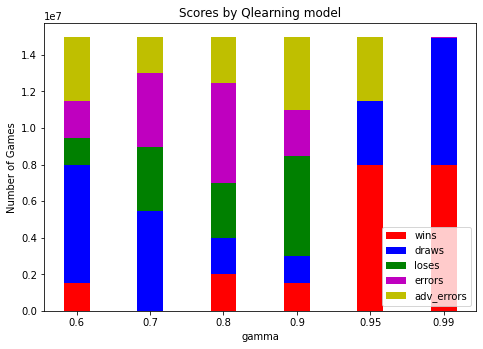

In [17]:
wins = scores[:,0]
draws = scores[:,1]
loses = scores[:,2]
errors = scores[:,3]
adv_errors = scores[:,4]
ind = np.arange(len(scores)) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, wins, width, color='r')
ax.bar(ind, draws, width,bottom=wins, color='b')
ax.bar(ind, loses, width,bottom=wins+draws, color='g')
ax.bar(ind, errors, width,bottom=wins+draws+loses, color='m')
ax.bar(ind, adv_errors, width,bottom=wins+draws+loses+errors, color='y')
ax.set_xlabel('gamma')
ax.set_ylabel('Number of Games')
ax.set_title('Scores by Qlearning model')
ax.set_xticks(ind)
ax.set_xticklabels( [str(i["gamma"]) for i in agents])
ax.legend(labels=['wins', 'draws', 'loses', 'errors', 'adv_errors'])
plt.show()

interpretations : 
* As we have already predicted, the more gamma is high, the more the model performs well. In fact, 0.95,0.99 are both quite similar. It means that the next state is really important regarding the choice we have to take.

#### Learning Rate tests

we will keep espsilon_decrease 0.0005 and gamma 0.99, regarding last results.

In [18]:
agents = [
    {"name":"QLearningAgent1", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.001},
    {"name":"QLearningAgent2", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.005},
    {"name":"QLearningAgent3", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.01},
    {"name":"QLearningAgent4", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.05},
    {"name":"QLearningAgent5", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.1},
    {"name":"QLearningAgent6", "epsilon_decrease":0.0005, "epsilon_min":0.001, "gamma":0.99, "learning_rate":0.2},
]
scores = np.array([[0, 0, 0, 0, 0] for _ in agents], dtype=int)
agents_obj = []

In [19]:
for i in range(0, len(agents), 2):
    p1 = agents[i]
    p1 = QLearningAgent(p1["name"], epsilon=1., epsilon_decrease=p1["epsilon_decrease"], 
                       epsilon_min=p1["epsilon_min"], gamma=p1["gamma"], learning_rate=p1["learning_rate"])
    p2 = agents[i+1]
    p2 = QLearningAgent(p2["name"], epsilon=1., epsilon_decrease=p2["epsilon_decrease"], 
                       epsilon_min=p2["epsilon_min"], gamma=p2["gamma"], learning_rate=p2["learning_rate"])
        
    ttt = TicTacToe(p1, p2, rewards)
    ttt.train(epochs=epochs, verbose=0)
    agents_obj.append(p1)
    agents_obj.append(p2)

100%|██████████| 1000000/1000000 [01:13<00:00, 13630.21it/s]


In [20]:
for i in range(len(agents_obj)):
    for j in range(i+1,len(agents_obj)):
        p1 = agents_obj[i]
        p2 = agents_obj[j]
        
        ttt = TicTacToe(p1, p2, rewards)
        ttt.play(games=epochs, verbose=0)
        scores[i] += p1.results
        scores[j] += p2.results

100%|██████████| 1000000/1000000 [00:47<00:00, 20993.72it/s]


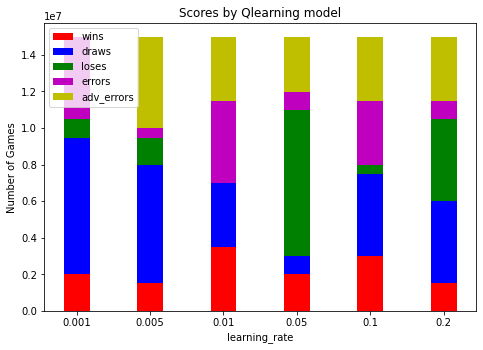

In [21]:
wins = scores[:,0]
draws = scores[:,1]
loses = scores[:,2]
errors = scores[:,3]
adv_errors = scores[:,4]
ind = np.arange(len(scores)) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, wins, width, color='r')
ax.bar(ind, draws, width,bottom=wins, color='b')
ax.bar(ind, loses, width,bottom=wins+draws, color='g')
ax.bar(ind, errors, width,bottom=wins+draws+loses, color='m')
ax.bar(ind, adv_errors, width,bottom=wins+draws+loses+errors, color='y')
ax.set_xlabel('learning_rate')
ax.set_ylabel('Number of Games')
ax.set_title('Scores by Qlearning model')
ax.set_xticks(ind)
ax.set_xticklabels( [str(i["learning_rate"]) for i in agents])
ax.legend(labels=['wins', 'draws', 'loses', 'errors', 'adv_errors'])
plt.show()

### Against Human Player

Re-execute first training and take the last agent

In [9]:
ha = HumanAgent("Camille")
ttt = TicTacToe(agents_obj[-1], ha, rewards)
ttt.run_game(verbose=2)

_____________
| v | v | v |
_____________
| v | x | v |
_____________
| v | v | v |
_____________
Choose an action 
(for example '0' corresponds to the first column, first line cell)
Available : [0, 1, 2, 3, 5, 6, 7, 8] = 2
_____________
| v | v | o |
_____________
| v | x | v |
_____________
| v | v | v |
_____________
_____________
| v | v | o |
_____________
| x | x | v |
_____________
| v | v | v |
_____________
Choose an action 
(for example '0' corresponds to the first column, first line cell)
Available : [0, 1, 5, 6, 7, 8] = 8
_____________
| v | v | o |
_____________
| x | x | v |
_____________
| v | v | o |
_____________
_____________
| v | v | o |
_____________
| x | x | x |
_____________
| v | v | o |
_____________
Player QLearningAgent6 wins :
_____________
| v | v | o |
_____________
| x | x | x |
_____________
| v | v | o |
_____________


In [10]:
ttt.reset_env()
ttt.run_game(verbose=2)

_____________
| v | v | v |
_____________
| v | x | v |
_____________
| v | v | v |
_____________
Choose an action 
(for example '0' corresponds to the first column, first line cell)
Available : [0, 1, 2, 3, 5, 6, 7, 8] = 3
_____________
| v | v | v |
_____________
| o | x | v |
_____________
| v | v | v |
_____________
_____________
| v | v | v |
_____________
| o | x | v |
_____________
| v | x | v |
_____________
Choose an action 
(for example '0' corresponds to the first column, first line cell)
Available : [0, 1, 2, 5, 6, 8] = 1
_____________
| v | o | v |
_____________
| o | x | v |
_____________
| v | x | v |
_____________
_____________
| v | o | v |
_____________
| o | x | v |
_____________
| x | x | v |
_____________
Choose an action 
(for example '0' corresponds to the first column, first line cell)
Available : [0, 2, 5, 8] = 2
_____________
| v | o | o |
_____________
| o | x | v |
_____________
| x | x | v |
_____________
_____________
| v | o | o |
_____________
| o | x | 

Aggresive strategy + exploit the first fail move of the human

The result is quite good.